In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import warnings 
  
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [2]:
# Read the CSV file into a pandas dataframe
df1 = pd.read_csv(r"E:\Copper Modelling\Copper_dataset.csv")
df1.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
df = df1.drop(["item_date","delivery date"], axis =1)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   quantity tons  181673 non-null  object 
 2   customer       181672 non-null  float64
 3   country        181645 non-null  float64
 4   status         181671 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   103754 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  selling_price  181672 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 16.6+ MB


In [152]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:
df2 = df1.drop(['id',  'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref',  'selling_price'], axis =1)

In [154]:
df2

,item_date,delivery date
0,20210401.0,20210701.0
1,20210401.0,20210401.0
2,20210401.0,20210101.0
3,20210401.0,20210101.0
4,20210401.0,20210301.0
...,...,...
181668,20200702.0,20200701.0
181669,20200702.0,20200701.0
181670,20200702.0,20200701.0
181671,20200702.0,20200701.0


# Remove unwanted spaces

In [13]:
def whitespace_remover(dataframe):
   
    # iterating over the columns
    for i in dataframe.columns:
         
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
             
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
            #dataframe[i] = dataframe[i].str.replace(' ', '')
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
#whitespace_remover(df)
 

In [14]:
# pd.concat([df, df1], axis=1, join='inner')

df = pd.concat([df, df2], axis = 1)

In [15]:
df

,id,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date,delivery date
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,20210401.0,20210701.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1047.00,20210401.0,20210401.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,20210401.0,20210101.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,20210401.0,20210101.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,20210401.0,20210301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,591.00,20200702.0,20200701.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,589.00,20200702.0,20200701.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,619.00,20200702.0,20200701.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,601.00,20200702.0,20200701.0


In [103]:
df.shape

(181673, 14)

In [16]:
df.nunique()

id               181671
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
selling_price      9795
item_date           252
delivery date        28
dtype: int64

# Data cleaning and transformation
# EDA

# Missing values


In [17]:
df.isna().sum()

id                   2
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
selling_price        1
item_date            1
delivery date        1
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   quantity tons  181673 non-null  object 
 2   customer       181672 non-null  float64
 3   country        181645 non-null  float64
 4   status         181671 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   103754 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  selling_price  181672 non-null  float64
 12  item_date      181672 non-null  float64
 13  delivery date  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# Converting necessary data types and replacing errors with Nan

what error ='coerce' do?

If the error argument is passed as "coerce" , then invalid parsing will be set as NaN

1. strip():- This method is used to delete all the leading and trailing characters mentioned in its argument.

2. lstrip():- This method is used to delete all the leading characters mentioned in its argument.

3. rstrip():- This method is used to delete all the trailing characters mentioned in its argument.

In [19]:
#converting date
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

#strip the 0 in material reference
df['material_ref'] = df['material_ref'].str.lstrip('0')

#converting to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   quantity tons  181672 non-null  float64
 2   customer       181672 non-null  float64
 3   country        181645 non-null  float64
 4   status         181671 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   103754 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  selling_price  181672 non-null  float64
 12  item_date      181670 non-null  object 
 13  delivery date  181670 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


# Treating missing values

In [21]:
df.isna().sum()

id                   2
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
selling_price        1
item_date            3
delivery date        3
dtype: int64

# # material reference columns has many null values considering it as valid feature, filling the null value with 'unknown'


In [22]:
# material reference columns has many null values considering it as important, filling the null value with 'unknown'
df.material_ref.fillna('unknown', inplace=True)

# Since our dataset is huge the null value counts present on other features are less than 1 % hence dropping it
df.dropna(inplace=True)

In [23]:
print('After dropping NA: ',df.shape)
print('\n')
print(df.isna().sum())

After dropping NA:  (181631, 14)


id               0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
selling_price    0
item_date        0
delivery date    0
dtype: int64


# Data Visualization

In [24]:
df_plot = df.copy()

df_plot.head(3)

,id,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date,delivery date
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,2021-04-01,2021-01-01


In [25]:
df_plot.skew()

quantity tons    424.641723
customer        -149.089203
country            0.753584
application        0.724324
thickness        303.471592
width              0.374845
product_ref        1.014983
selling_price    301.353247
dtype: float64

# Finding Skewness 

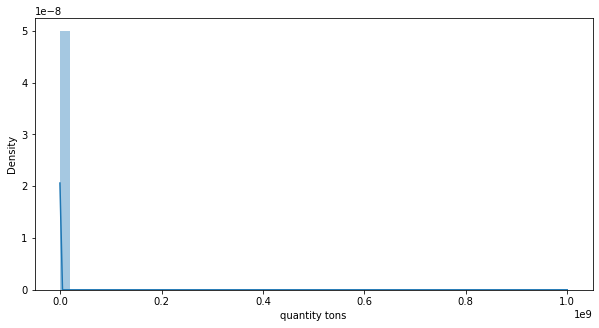

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df_plot['quantity tons'])
plt.show()


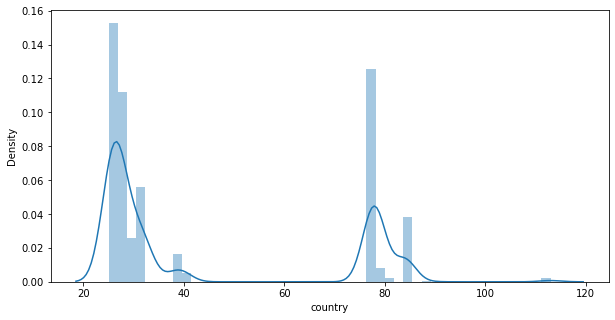

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df_plot['country'])
plt.show()


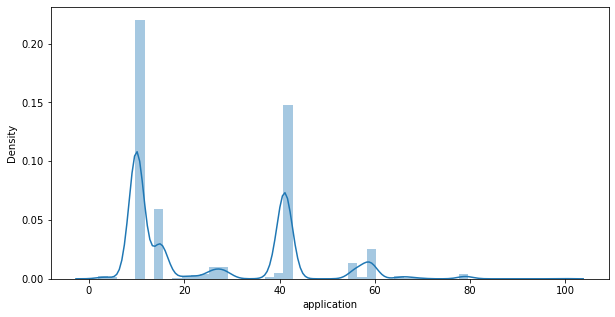

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(df_plot['application'])
plt.show()



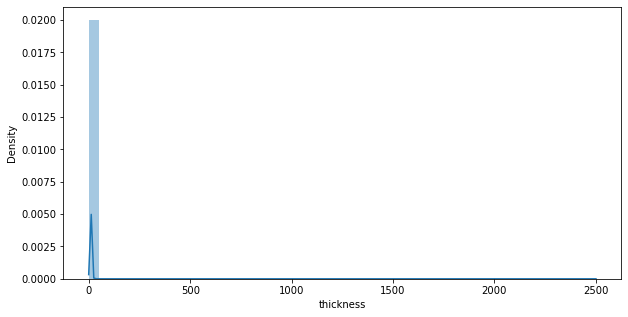

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df_plot['thickness'])
plt.show()


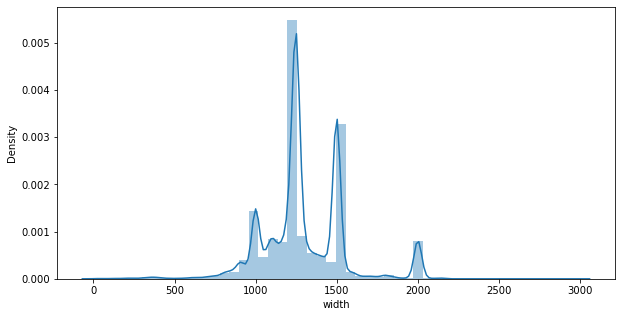

In [30]:

plt.figure(figsize=(10,5))
sns.distplot(df_plot['width'])
plt.show()


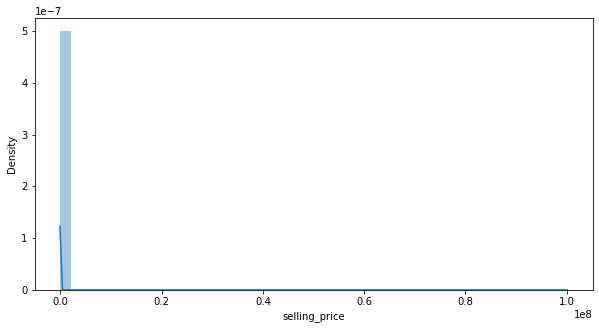

In [31]:

plt.figure(figsize=(10,5))
sns.distplot(df_plot['selling_price'])
plt.show()

# Observation

From the above distplot we can see that the features 
'selling_price' ,'thickness' ,'quantity tons' are skewed

In [7]:
# Finding is there any negative values in the skewed features and replace it with Nan Values

In [32]:
have_null = df_plot['selling_price'] <= 0
print(have_null.sum())
df_plot.loc[have_null, 'selling_price'] = np.nan

have_null = df_plot['quantity tons'] <= 0
print(have_null.sum())
df_plot.loc[have_null, 'quantity tons'] = np.nan

have_null = df_plot['thickness'] <= 0
print(have_null.sum())
df_plot.loc[have_null, 'thickness'] = np.nan


7
4
0


In [33]:
df_plot.dropna(inplace=True)
len(df_plot)

181620

# Applying Log on the skewed data

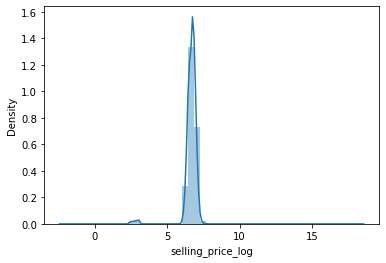

In [34]:
df_plot['selling_price_log'] = np.log(df_plot['selling_price'])
sns.distplot(df_plot['selling_price_log'])
plt.show()



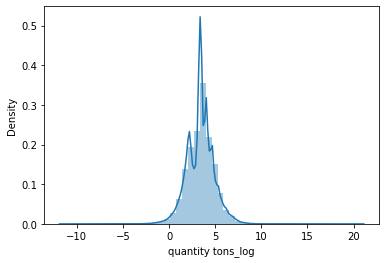

In [35]:
df_plot['quantity tons_log'] = np.log(df_plot['quantity tons'])
sns.distplot(df_plot['quantity tons_log'])
plt.show()



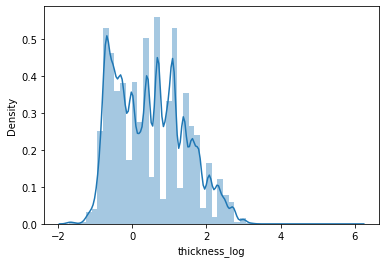

In [36]:
df_plot['thickness_log'] = np.log(df_plot['thickness'])
sns.distplot(df_plot['thickness_log'])
plt.show()

In [37]:
# Viewing the new dataset

df_plot.head(3)

,id,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date,delivery date,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,2021-04-01,2021-07-01,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,1047.00,2021-04-01,2021-04-01,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,644.33,2021-04-01,2021-01-01,6.468211,5.956169,-0.967584


In [20]:
df_plot.columns

Index(['id', 'quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'selling_price', 'item_date', 'delivery date', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [38]:
active_columns = df_plot.drop(['quantity tons', 'selling_price','thickness' ], axis =1)
active_columns.columns

Index(['id', 'customer', 'country', 'status', 'item type', 'application',
       'width', 'material_ref', 'product_ref', 'item_date', 'delivery date',
       'selling_price_log', 'quantity tons_log', 'thickness_log'],
      dtype='object')

In [39]:
cor= df_plot.drop(['quantity tons', 'selling_price','thickness' ], axis =1).corr()
cor

,customer,country,application,width,product_ref,selling_price_log,quantity tons_log,thickness_log
customer,1.000000,0.083574,0.000895,0.050527,-0.032331,0.008731,0.080141,0.079971
country,0.083574,1.000000,-0.019334,0.055286,-0.147370,-0.029110,-0.088899,-0.065203
application,0.000895,-0.019334,1.000000,-0.204451,-0.131871,0.022665,0.063991,-0.197563
width,0.050527,0.055286,-0.204451,1.000000,-0.034428,-0.069453,0.034431,0.387243
product_ref,-0.032331,-0.147370,-0.131871,-0.034428,1.000000,0.001181,0.064064,0.234330
selling_price_log,0.008731,-0.029110,0.022665,-0.069453,0.001181,1.000000,0.023898,-0.154999
quantity tons_log,0.080141,-0.088899,0.063991,0.034431,0.064064,0.023898,1.000000,0.042005
thickness_log,0.079971,-0.065203,-0.197563,0.387243,0.234330,-0.154999,0.042005,1.000000


<AxesSubplot:>

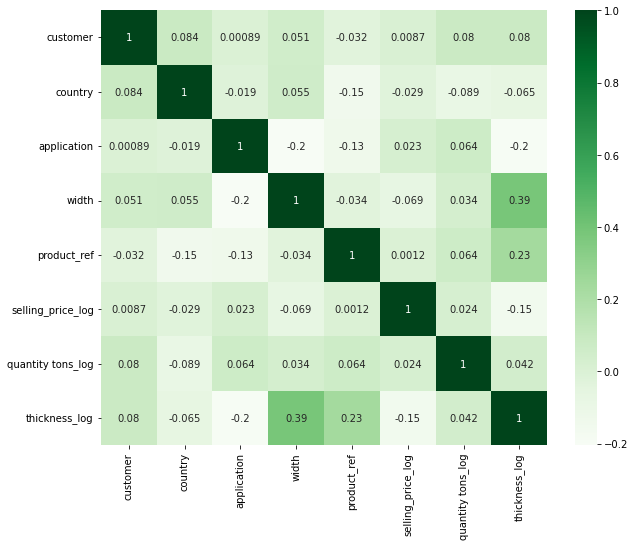

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True,cmap="Greens")

# Observation

From the correlation map I can see there is no much correlation between the features

1) width and thickness_log are correlated around 39 %

2) product_ref and thickness_log are correlated around 23%

In [41]:
# creating two empty list to store categorical column names and numerical column names respectively
categorical_list = []
num_list = []


# looping on whole dataset for getting list of categorical data column name

for i in df_plot.columns:
    if df_plot[i].dtype == 'object':
        categorical_list.append(i)
    elif df_plot[i].dtype in ('int64','float64'):
        num_list.append(i)

        
print("Categorical: ",categorical_list)
print('\n')
print("Numeric: ",num_list)


Categorical:  ['id', 'status', 'item type', 'material_ref', 'item_date', 'delivery date']


Numeric:  ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price', 'selling_price_log', 'quantity tons_log', 'thickness_log']


# Scaling and its necessity

Scaling. This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1

* if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. 
* But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units.
* The results would vary greatly between different units, 5kg and 5000gms.
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.



In [42]:
data = df_plot.copy()
data.head(2)

,id,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date,delivery date,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,854.0,2021-04-01,2021-07-01,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,1047.0,2021-04-01,2021-04-01,6.953684,6.643822,-0.223144


In [43]:
from sklearn.preprocessing import LabelEncoder

cat_col=['country','status','customer','item type','application','product_ref']
le = LabelEncoder()

for i in cat_col:
    print(i)
    print( data[i].unique())
    data[i] = le.fit_transform(data[i])
    print("Labels: ",data[i].unique())
    print('\n')

country
[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
Labels:  [ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]


status
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
Labels:  [7 0 6 1 2 8 5 4 3]


customer
[30156308. 30202938. 30153963. ... 30349515. 30284694. 30161559.]
Labels:  [ 51 288  39 ... 952 687  97]


item type
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
Labels:  [5 6 3 1 2 0 4]


application
[10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
Labels:  [ 4 17 12 21  5  2 14 19 18 10 11  6  7 23 13  8 16  9 24 28  1 29  0  3
 15 26 27 22 20 25]


product_ref
[1670798778 1668701718     628377     640665     611993 1668701376
  164141591 1671863738 1332077137     640405 1693867550 1665572374
 1282007633 1668701698     628117 1690738206     628112     640400
 1671876026  164336407  164337175 1668701725 166557

# Regression Evaluation metrics

In [57]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())
    

# Function for calculating all the relevant metrics 
def print_score(m):
    res = [
        rmse(m.predict(X_train),Y_train), 
        rmse(m.predict(X_test),Y_test), 
        m.score(X_train, Y_train), 
        m.score(X_test,Y_test),
        median_absolute_error(m.predict(X_train), Y_train), 
        median_absolute_error(m.predict(X_test),Y_test),
        mae(m.predict(X_train), Y_train), 
        mae(m.predict(X_test),Y_test)
    ]
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + 
          "\nScore-Test: " + str(res[3]) + "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + 
          "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


# One Hot Encoding on relevant categorical variables

In [116]:
df_plot.dropna(inplace=True)

In [119]:
X=df_plot[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_plot['selling_price_log']

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()

# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
df_plot.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

# Assigning X and Y for training and testing

# Train test split

from sklearn.preprocessing import StandardScaler

# fit scaler on training data

scaler = StandardScaler()

#saving pickle file for scaling

pickle.dump(scaler, open('scaling_regression.pkl', 'wb'))

# transform training data

X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [113]:
#importing Sklearn library for spliting train dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y.reshape(-1), test_size = 0.2, random_state=42)

# Model Training

# Regressor


In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Rgr_models = []

score = []

In [121]:
%%time

# Linear Regression

from sklearn.linear_model import LinearRegression


# Instantiate the model
lModel = LinearRegression()

# Fit the model to the data
lModel.fit(X_train,Y_train)

Rgr_models.append(lModel)
# print score of the model

print_score(lModel)
#score.append(r2_score(Y_test, Y_pred))

RMSE-Train: 0.21609057247394167
RMSE-Test: 157338484137.1591
Score-Train: 0.8529225280611665
Score-Test: -7.71563045640883e+22
MedAE-Train: 0.15546685386016268
MedAE-Test: 0.1556639157895825
MeanAE-Train: 0.1728540434012626
MeanAE-Test: 1160898022.1312504 

Wall time: 675 ms


# Random Forest Regressor

In [127]:
%%time

from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train,Y_train)

Rgr_models.append(rf)
# print score of the model
print_score(rf)

RMSE-Train: 0.05658591096540393
RMSE-Test: 0.14125297314501287
Score-Train: 0.9899146461552178
Score-Test: 0.9378134174471935
MedAE-Train: 0.02796060645851073
MedAE-Test: 0.076310835869696
MeanAE-Train: 0.038924106029906765
MeanAE-Test: 0.1043656551308373 

Wall time: 9min 11s


# Decision Tree Regressor

In [123]:
%%time
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

# Instantiate the model
DTR.fit(X_train, Y_train)

Rgr_models.append(DTR)
print_score(DTR)

RMSE-Train: 1.532379888579228e-17
RMSE-Test: 0.18664152850023297
Score-Train: 1.0
Score-Test: 0.891427944436094
MedAE-Train: 0.0
MedAE-Test: 0.06879239934472325
MeanAE-Train: 2.7813648067638266e-19
MeanAE-Test: 0.12430707697770191 

Wall time: 8.11 s


# Gradient Bossting Regressor

In [124]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()

GBR.fit(X_train,Y_train)

Rgr_models.append(GBR)
# print score of the model

print_score(GBR)

RMSE-Train: 0.1864047696852243
RMSE-Test: 0.18124396444232896
Score-Train: 0.8905568567078357
Score-Test: 0.8976168230249889
MedAE-Train: 0.1461197029243393
MedAE-Test: 0.14640860833932745
MeanAE-Train: 0.15386631941503418
MeanAE-Test: 0.15372156955017083 

Wall time: 1min 51s


#  ADA Boost Regressor

In [125]:
%%time
from sklearn.ensemble import AdaBoostRegressor


# Instantiate the model
AdaBoost = AdaBoostRegressor()


# Instantiate the model
AdaBoost.fit(X_train, Y_train)

Rgr_models.append(AdaBoost)
# print score of the model
print_score(AdaBoost)

RMSE-Train: 0.2911845243351031
RMSE-Test: 0.2916883874491138
Score-Train: 0.7329386158261955
Score-Test: 0.7348206055891007
MedAE-Train: 0.18467856903138546
MedAE-Test: 0.183140905516602
MeanAE-Train: 0.21972077688725347
MeanAE-Test: 0.21856694804348523 

Wall time: 50 s


# XGBoost 

In [126]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor

from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()


# Fit the model to the data

xgbr.fit(X_train, Y_train)

Rgr_models.append(xgbr)

# print score of the model

print_score(xgbr)

RMSE-Train: 0.15376271040173736
RMSE-Test: 0.15541547373138476
Score-Train: 0.9255308206763327
Score-Test: 0.9247181975908217
MedAE-Train: 0.11340942868540482
MedAE-Test: 0.11789489815744014
MeanAE-Train: 0.12477789393419084
MeanAE-Test: 0.128804673615348 

Wall time: 22.6 s


In [128]:
Rgr_models

[LinearRegression(),
 DecisionTreeRegressor(),
 GradientBoostingRegressor(),
 AdaBoostRegressor(),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...),
 RandomForestRegressor()]

# Comparing all regressor model

In [129]:
def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects 
    data = {'Metrics':['rmse','MedAE','MAE','R-Squared']}
    
    df_train = pd.DataFrame(data)
    
    df_test = pd.DataFrame(data)
    

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test)
      
       # then predict on the test set
      res = [
          rmse(model.predict(X_train), y_train), 
          rmse(model.predict(X_test),y_test),
          metrics.median_absolute_error(model.predict(X_train),y_train), 
          metrics.median_absolute_error(model.predict(X_test),y_test),
          metrics.mean_absolute_error(model.predict(X_train),y_train), 
          metrics.mean_absolute_error(model.predict(X_test),y_test),
          metrics.r2_score(model.predict(X_train),y_train), 
          metrics.r2_score(model.predict(X_test),y_test)
      ]
      
      df_train[name] = [res[0], res[2], res[4], res[6]]
      
      df_test[name] = [res[1], res[3], res[5], res[7]]
      
    return df_train,df_test



In [130]:
%%time

# list of models object
# list of models name
models= [lModel, DTR, rf, GBR, AdaBoost, xgbr]

names = ['LR','DTree','RForest','GrBo', 'ADABoost','XGBR']


comp_model_train,comp_model_test = compare_models(models, names, X_train, Y_train, X_test, Y_test)



Wall time: 2min 51s
Compiler : 150 ms


In [131]:
comp_model_train[:]


,Metrics,LR,DTree,RForest,GrBo,ADABoost,XGBR
0,rmse,0.216091,1.532380e-17,0.056586,0.186405,0.291185,0.153763
1,MedAE,0.155467,0.000000e+00,0.027961,0.146120,0.184679,0.113409
2,MAE,0.172854,2.781365e-19,0.038924,0.153866,0.219721,0.124778
3,R-Squared,0.827504,1.000000e+00,0.989518,0.874181,0.601196,0.917984


In [132]:
comp_model_test[:]


,Metrics,LR,DTree,RForest,GrBo,ADABoost,XGBR
0,rmse,1.573385e+11,0.186642,0.141253,0.181244,0.291688,0.155415
1,MedAE,1.556639e-01,0.068792,0.076311,0.146409,0.183141,0.117895
2,MAE,1.160898e+09,0.124307,0.104366,0.153722,0.218567,0.128805
3,R-Squared,-5.444298e-05,0.892724,0.934649,0.883921,0.602650,0.917888


# Observation

From comparing the scores between train and test data For this model

Random forest regressor performs Good on the basis of R-squared also based on MAE

# Need to perform Hyper paramteric tuning on the models

RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

* The first step is to write the parameters that we want to consider
* From these parameters select the best ones.(which are printed in output)

In [166]:
# function for Randomized Search CV

def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator= model, param_distributions=param_grid, n_iter=20,
                             cv=3, verbose=2, random_state=42, n_jobs=-1)
  # Fit the random search model
  random.fit(X_train, Y_train)
  
  print(random.best_params_)

In [57]:
%%time
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(RandomForestRegressor(), X_train, Y_train, param_grid=rf_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 100, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'bootstrap': False}
Wall time: 1min 2s


In [63]:
%%time
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16], 
 'learning_rate' : [1, 0.5, 0.25],
 #'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(GradientBoostingRegressor(),X_train,Y_train, param_grid= GBR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 16, 'min_samples_split': 0.2, 'learning_rate': 1}
Wall time: 2min 50s


In [64]:
%%time
# create DecisionTreeRegressor parameters dict for tunning
DTR_para_grid = {
                  "splitter":["best","random"],
            #"max_depth" : np.linspace(1, 32, 32, endpoint=True),
           "min_samples_leaf":np.linspace(0.1, 0.5, 5, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.5,0.9],
           "max_features":["auto","log2","sqrt",None],
           }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(DecisionTreeRegressor(), X_train, Y_train, param_grid=DTR_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None}
Wall time: 7.69 s


In [65]:
%%time
# create parameters dict for tunning
XGB_para_grid = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 #"max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }

# passing data for hyper parameter tunning with Randomized search cv

random_Search(XGBRegressor(), X_train, Y_train, param_grid=XGB_para_grid)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 1, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.4}
Wall time: 7min 56s


# Applying the hyper paramter tuned values to the regressor model

# Hyper tuned RF regressor

In [167]:
%%time   
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf=  RandomForestRegressor(**{'n_estimators': 100, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 
                               'bootstrap': False})

#Note:     **  --to restructre the dictionary and pass the values as paramters

# Fit the model to the data
rf.fit(X_train, Y_train)


# print score of the model

print_score(rf)

#Fitting 3 folds for each of 20 candidates, totalling 60 fits
#{'n_estimators': 100, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'bootstrap': False}


RMSE-Train: 0.5481200327428118
RMSE-Test: 0.5512891182963051
Score-Train: 0.05370647981361365
Score-Test: 0.05275933128420984
MedAE-Train: 0.16752259124102986
MedAE-Test: 0.16751275060953263
MeanAE-Train: 0.246731113020187
MeanAE-Test: 0.24777431328499608 

Wall time: 26.4 s


# Hyper tuned DTR

In [168]:
%%time 
# Fitting 3 folds for each of 20 candidates, totalling 60 fits
# {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None}

 
# Fit a Decision Tree Regressor model to the train dataset

# Instantiate the model
DTR = DecisionTreeRegressor(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 
                               'min_samples_leaf': 0.2, 'max_features': None})

# Instantiate the model
DTR.fit(X_train, Y_train)


# print score of the model
print_score(DTR)


RMSE-Train: 0.5517129887385319
RMSE-Test: 0.5552658330306767
Score-Train: 0.04125980998135903
Score-Test: 0.039044233144559626
MedAE-Train: 0.16530716071365958
MedAE-Test: 0.16515164344329936
MeanAE-Train: 0.2446267426104889
MeanAE-Test: 0.24551918560408717 

Wall time: 912 ms


# Hyper tuned GBR

In [169]:
%%time  
# -- to print the wall time ie total time taken

# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 16, 'min_samples_split': 0.2, 'learning_rate': 1})


GBR.fit(X_train, Y_train)
# print score of the model
print_score(GBR)


# Fitting 3 folds for each of 20 candidates, totalling 60 fits
# {'n_estimators': 16, 'min_samples_split': 0.2, 'learning_rate': 1}

RMSE-Train: 0.18810683624472604
RMSE-Test: 0.1801840267583557
Score-Train: 0.8885490757255637
Score-Test: 0.8988108210604594
MedAE-Train: 0.14364253609085464
MedAE-Test: 0.1434894020510522
MeanAE-Train: 0.1526739992342738
MeanAE-Test: 0.15206416472912052 

Wall time: 20.8 s


# Hyper tuned XGBR

In [170]:
%%time
# Fit a XGB Regressor model to the train dataset

# Instantiate the model
xgbr = XGBRegressor(**{'min_child_weight':1,  'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.4})

# Fit the model to the data

xgbr.fit(X_train, Y_train)

# print score of the model

print_score(xgbr)

# Fitting 3 folds for each of 20 candidates, totalling 60 fits
# {'min_child_weight': 1, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.4}



RMSE-Train: 0.1679098454370235
RMSE-Test: 0.16625595280171124
Score-Train: 0.9111971631092213
Score-Test: 0.9138498766227885
MedAE-Train: 0.1293515825687015
MedAE-Test: 0.13099891546447395
MeanAE-Train: 0.13842216223804757
MeanAE-Test: 0.14006113273167775 

Wall time: 16.2 s


# Comparing the metrics for tuned models

In [171]:
models= [rf, GBR, DTR, xgbr]

names =['H_RF','H_gbr','H_dtr', 'H_xgbr']
comp_model_train,comp_model_test =  compare_models(models, names, X_train, Y_train, X_test, Y_test)


In [172]:
comp_model_train[:]

,Metrics,H_RF,H_gbr,H_dtr,H_xgbr
0,rmse,0.548120,0.188107,0.551713,0.167910
1,MedAE,0.167523,0.143643,0.165307,0.129352
2,MAE,0.246731,0.152674,0.244627,0.138422
3,R-Squared,-72.432996,0.874175,-22.236660,0.900430


In [173]:
comp_model_test[:]

,Metrics,H_RF,H_gbr,H_dtr,H_xgbr
0,rmse,0.551289,0.180184,0.555266,0.166256
1,MedAE,0.167513,0.143489,0.165152,0.130999
2,MAE,0.247774,0.152064,0.245519,0.140061
3,R-Squared,-73.078487,0.887785,-22.435798,0.904338


# Observation

From comparing the scores between train and test data For this model after the hyper paramteric tuning

XGBoost regressor performs Good on the basis of R-squared also based on MAE

In [176]:
xg_para = {
    "learning_rate"    : [0.05, 0.10, 0.15] ,
 #"max_depth"        : range(3,10,2),
 "min_child_weight" : range(1,6,2),
 "gamma"            : [ 0.0, 0.1, 0.2 ],
 "colsample_bytree" : [ 0.3, 0.4] 
 }


In [177]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator= xgbr, param_distributions= xg_para, cv=3)
random_search.fit(X_train, Y_train)
print("Best hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'min_child_weight': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}
Mean squared error: 0.027800734778563777
R-squared: 0.9133521542045939
Wall time: 4min 24s


In [87]:
print("Categorical: ",categorical_list)
print("Numeric: ",num_list)

Categorical:  ['id', 'item_date', 'status', 'item type', 'material_ref', 'delivery date']
Numeric:  ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price', 'selling_price_log', 'quantity tons_log', 'thickness_log']


# # Predict the status for a new sample


In [178]:
# X=df_plot[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
 
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_ohe2

new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])

new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()

new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)

new_sample_scaled = scaler.transform(new_sample)
new_pred = xgbr.predict(new_sample_scaled)

print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [482.51215]


# Storing data in pickle file

In [180]:
# Saving the model
import pickle
with open('Regr_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
# with open('t.pkl', 'wb') as f:
#     pickle.dump(ohe, f)
# with open('s.pkl', 'wb') as f:
#     pickle.dump(ohe2, f)

# Classification Model

In [96]:
df_plot['status'].isin(['Won', 'Lost'])
df_plot[df_plot['status'].isin(['Won', 'Lost'])]

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,6.400257,4.670802,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,6.428105,1.443523,-0.342490


# Performing Label Encoding

In [183]:
from sklearn.preprocessing import LabelEncoder

cat_col=['country','status','customer','item type','application','product_ref']
le = LabelEncoder()

for i in cat_col:
    print(i)
    print( df[i].unique())
    df[i] = le.fit_transform(df[i])
    print("Labels: ",df[i].unique())
    print('\n')

country
[ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
Labels:  [ 3  0  4  5  6 10  2  9 16 11  1  7  8 13 12 15 14]


status
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
Labels:  [7 0 6 1 2 8 5 4 3]


customer
[30156308. 30202938. 30153963. ... 30349515. 30284694. 30161559.]
Labels:  [ 51 288  39 ... 952 687  97]


item type
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
Labels:  [5 6 3 1 2 0 4]


application
[10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
Labels:  [ 4 17 12 21  5  2 14 19 18 10 11  6  7 23 13  8 16  9 24 28  1 29  0  3
 15 26 27 22 20 25]


product_ref
[1670798778 1668701718     628377     640665     611993 1668701376
  164141591 1671863738 1332077137     640405 1693867550 1665572374
 1282007633 1668701698     628117 1690738206     628112     640400
 1671876026  164336407  164337175 1668701725 166557

In [184]:
cdf = df.loc[df["status"].isin([7,1])] # 7 is Won, 1 is Lost
cdf.status.value_counts()

7    116004
1     34431
Name: status, dtype: int64

In [186]:
print("original label: ",cdf['status'].unique())
cdf['status'] = le.fit_transform(cdf['status'])
print("Reencoded label: ",cdf['status'].unique())

original label:  [1 0]
Reencoded label:  [1 0]


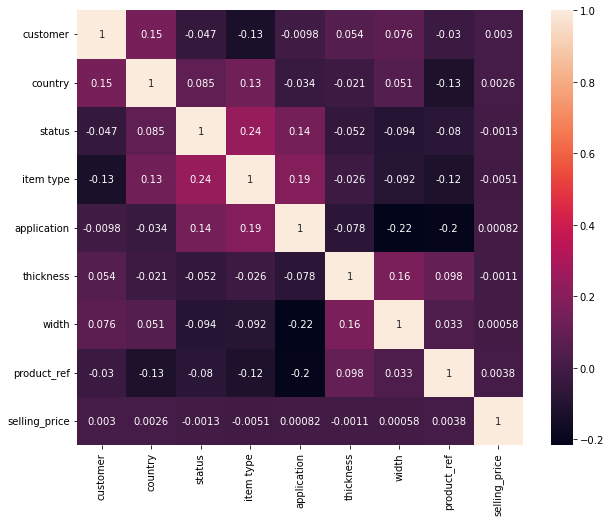

In [189]:
#understanding correlation with feautures and target
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,2: ].corr(), annot =True)
plt.show()

In [191]:
from sklearn.model_selection import train_test_split
x=cdf[['quantity tons','item type','country','application','thickness','width', 'product_ref','selling_price']].values
y=cdf[['status']].values

<AxesSubplot:>

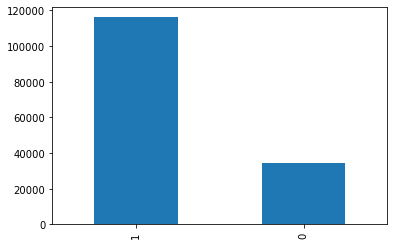

In [192]:
cdf['status'].value_counts().plot(kind='bar')

# Oversampling using smote(Synthetic Minority Over-sampling Technique)
It is a more sophisticated technique than the previous ones. 

Random sampling is easy, but the new samples don’t add more information to the machine learning algorithms. 

SMOTE improves on that.


In [193]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
x, y = smote.fit_resample(x, y)


In [194]:
# data normalization with sklearn
# standard scaler -> StandardScaler() - -1 to 1 or MinMaxScaler() - 0 to 1
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
scaler = StandardScaler().fit(x)

#saving pickle file for scaling
pickle.dump(scaler, open('scaling_Classification.pkl', 'wb'))

# transform training data
x = scaler.transform(x)

#spliting train and test
X_train, X_test, Y_train, Y_test = train_test_split(x,y.reshape(-1),test_size=0.3)

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score,confusion_matrix, f1_score,roc_auc_score

C_Models=[]
Accuracy=[]

In [196]:
#LogisticRegression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test the LogisticRegression model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('LogisticRegression')
Accuracy.append(accu)
accu

0.6939356062238696

In [198]:
%%time

#AdaBoostClassifier model
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, Y_train)

# Test the AdaBoostClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('AdaBoostClassifier')
Accuracy.append(accu)
accu

Wall time: 1min 17s


0.7873367527261756

In [199]:
%%time

#Decision Tree model
model = DecisionTreeClassifier(max_depth=18)
model.fit(X_train, Y_train)

# Test the Decision Tree model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('Decision Tree')
Accuracy.append(accu)
accu

Wall time: 4.58 s


0.9077051276525437

In [200]:
%%time

#naive_bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Test the naive_bayes model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('GaussianNB')
Accuracy.append(accu)
accu

Wall time: 289 ms


0.619987644210738

In [201]:
%%time

#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, Y_train)

# Test the RandomForestClassifier model
Y_pred = model.predict(X_test)

# Evaluate the performance of the model
accu=accuracy_score(Y_test, Y_pred)
C_Models.append('RandomForestClassifier')
Accuracy.append(accu)
accu

Wall time: 15.6 s


0.9322011982242144

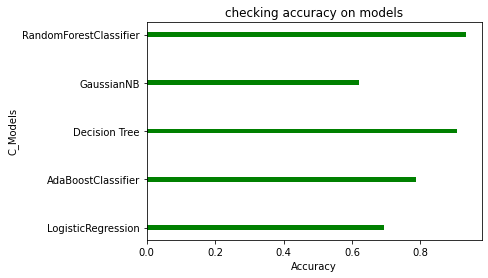

In [202]:
plt.barh(C_Models, Accuracy,
        height = 0.1, color = "green")
 
plt.xlabel("Accuracy")
plt.ylabel("C_Models")
plt.title("checking accuracy on models")
plt.show()

# Observation

In this classifier model, RandomForestClassifier model gives the best accuracy, hence for this dataset, it is the best-performing model

In [203]:
#creating pickle files to save the trained models in a file

#RandomForestClassifier model
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train)

pickle.dump(model, open('classification.pkl', 'wb'))

In [204]:
#metrics
Y_pred=model.predict(X_test)
print('confusion_matrix\n',confusion_matrix(Y_test, Y_pred))
print('accuracy_score',accuracy_score(Y_test, Y_pred))
print('f1_score',f1_score(Y_test, Y_pred))
print('roc_auc_score',roc_auc_score(Y_test, Y_pred))

confusion_matrix
 [[32722  1945]
 [ 2420 32516]]
accuracy_score 0.9372871858971596
f1_score 0.9371010274219348
roc_auc_score 0.9373126244160073


In [207]:
cdf.head(2)

,id,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,item_date,delivery date
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,51,3,1,5,4,2.0,1500.0,DEQ1 S460MC,24,854.0,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,768.024839,288,0,1,5,17,0.8,1210.0,104991,22,1047.0,2021-04-01,2021-04-01


In [205]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

ValueError: X has 15 features, but StandardScaler is expecting 8 features as input.

# Classifier Evalution Metrics


Confusion Matrix:
[[32722  1945]
 [ 2420 32516]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     34667
           1       0.94      0.93      0.94     34936

    accuracy                           0.94     69603
   macro avg       0.94      0.94      0.94     69603
weighted avg       0.94      0.94      0.94     69603





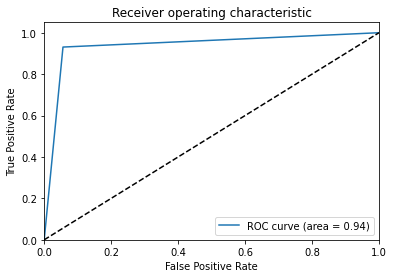

In [208]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print("Classification Report:")
print(classification_report(Y_test, Y_pred))
print('\n')

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# # Predict the status for a new sample


In [105]:
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [107]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)